# VAE - different clipping parameter

### 0.3 - 0.75

In [1]:
import numpy as np
import os
import tensorflow as tf
import json
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path
path = str(Path(os.getcwd()).parent)

import sys
sys.path.insert(0,path)

from breakout.vae.vae import ConvVAE

In [51]:
path = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200518/tf_vae/'

In [39]:
vaelist = os.listdir(path)
vae_modellist = []
for model in vaelist:
    if 'train_param' not in model:
        vae_modellist.append(model)
vae_modellist.sort()
len(vae_modellist)

5

In [6]:
recordpath = '/home/student/Dropbox/MA/worldmodel/worldmodel-breakout-server-version-v3/200423/record_noframeskip/'
recordlist = os.listdir(recordpath)[:10]

In [7]:
data = np.load(recordpath + recordlist[0])['obs']

In [8]:
data.shape

(1000, 64, 64, 3)

In [9]:
obs1 = data[100]
obs2 = data[200]
obs3 = data[300]
obs4 = data[400]
obs = [obs1,obs2,obs3,obs4]

In [26]:
random_vec_for_generation1 = np.random.standard_normal(size=(1,64))
random_vec_for_generation2 = np.random.standard_normal(size=(1,64))
random_vec_for_generation3 = np.random.standard_normal(size=(1,64))
random_vec_for_generation4 = np.random.standard_normal(size=(1,64))

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.


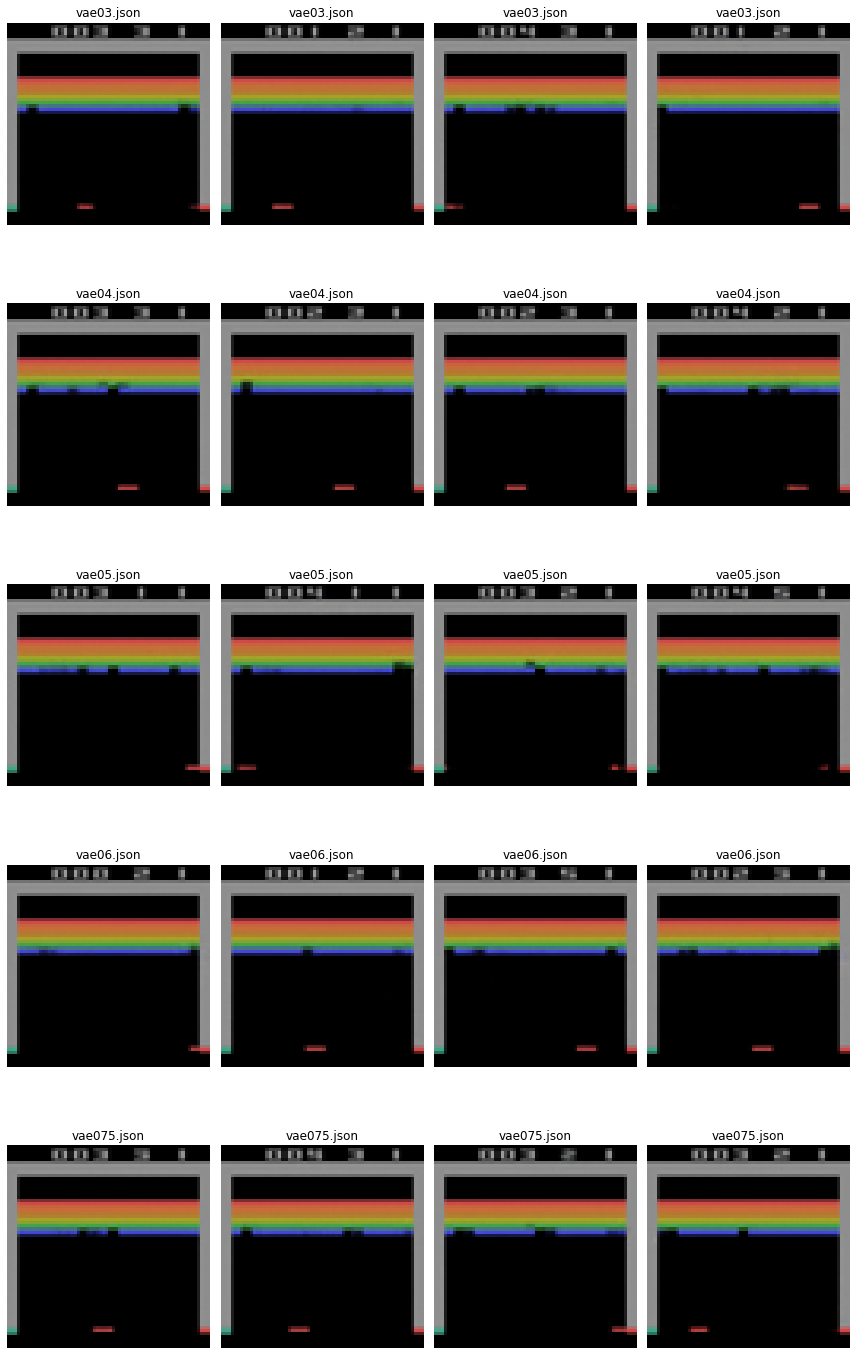

In [29]:
fig = plt.figure(figsize=(12,20))
counter = 1
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
for vmodel in range(len(vaelist)):
    vae = ConvVAE(z_size=64,
              batch_size=1,
              learning_rate=0.0001,
              kl_tolerance=kl_tolerance[vmodel],
              is_training=False,
              reuse=False,
              gpu_mode=True)
    vae.load_json(path + '/' + vaelist[vmodel])
    for i in range(4):
        if i==0:
            z_dec = vae.decode(random_vec_for_generation1)
        elif i==1:
            z_dec = vae.decode(random_vec_for_generation2)
        elif i==2:
            z_dec = vae.decode(random_vec_for_generation3)
        elif i==3:
            z_dec = vae.decode(random_vec_for_generation4)
        plt.subplot(5,4,counter)
        plt.imshow(z_dec.reshape(64,64,3))
        plt.title(vaelist[vmodel])
        plt.axis('off')
        counter+=1
plt.tight_layout()
plt.show()

In [41]:
for i in range(len(obs)):
    obs[i] = (obs[i]*255.).astype(np.int)

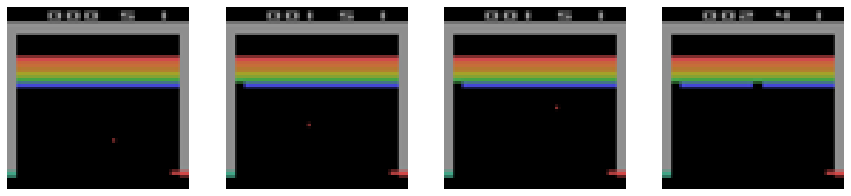

In [49]:
fig = plt.figure(figsize=(15,20))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(obs[i])
    plt.axis('off')
plt.show()

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.


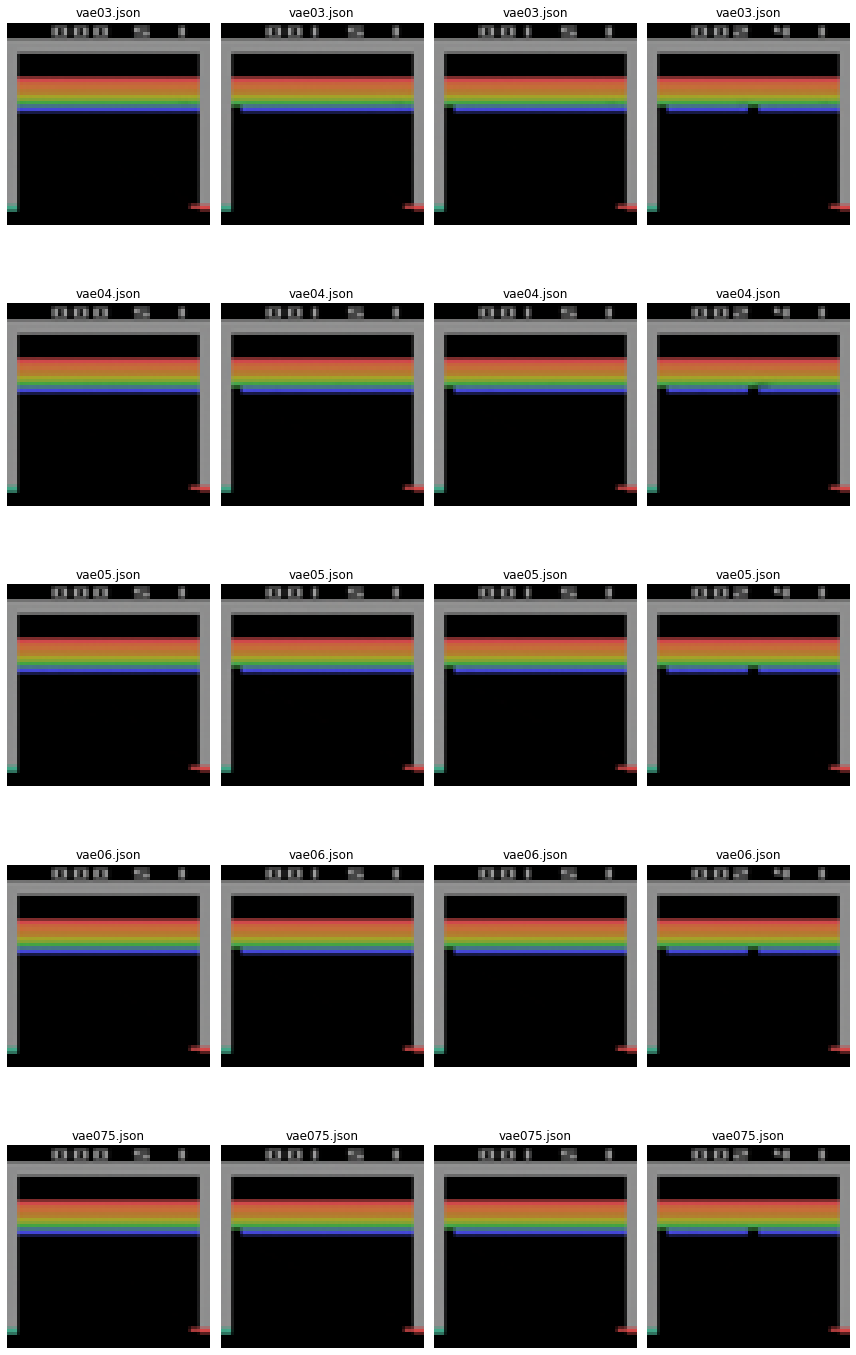

In [53]:
obs = [obs1,obs2,obs3,obs4]
fig = plt.figure(figsize=(12,20))
counter = 1
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
for vmodel in range(len(vaelist)): 
    vae = ConvVAE(z_size=64,
              batch_size=1,
              learning_rate=0.0001,
              kl_tolerance=kl_tolerance[vmodel],
              is_training=False,
              reuse=False,
              gpu_mode=True)
    vae.load_json(path + '/' + vaelist[vmodel])
    for i in range(4):
        if i==0:
            z_dec = vae.decode(vae.encode(obs[0].reshape(1,64,64,3)))
        elif i==1:
            z_dec = vae.decode(vae.encode(obs[1].reshape(1,64,64,3)))
        elif i==2:
            z_dec = vae.decode(vae.encode(obs[2].reshape(1,64,64,3)))
        elif i==3:
            z_dec = vae.decode(vae.encode(obs[3].reshape(1,64,64,3)))
        plt.subplot(5,4,counter)
        plt.imshow(z_dec.reshape(64,64,3))
        plt.axis('off')
        plt.title(vaelist[vmodel])
        counter+=1
plt.tight_layout()
plt.show()

INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.
INFO:tensorflow:Model using gpu.


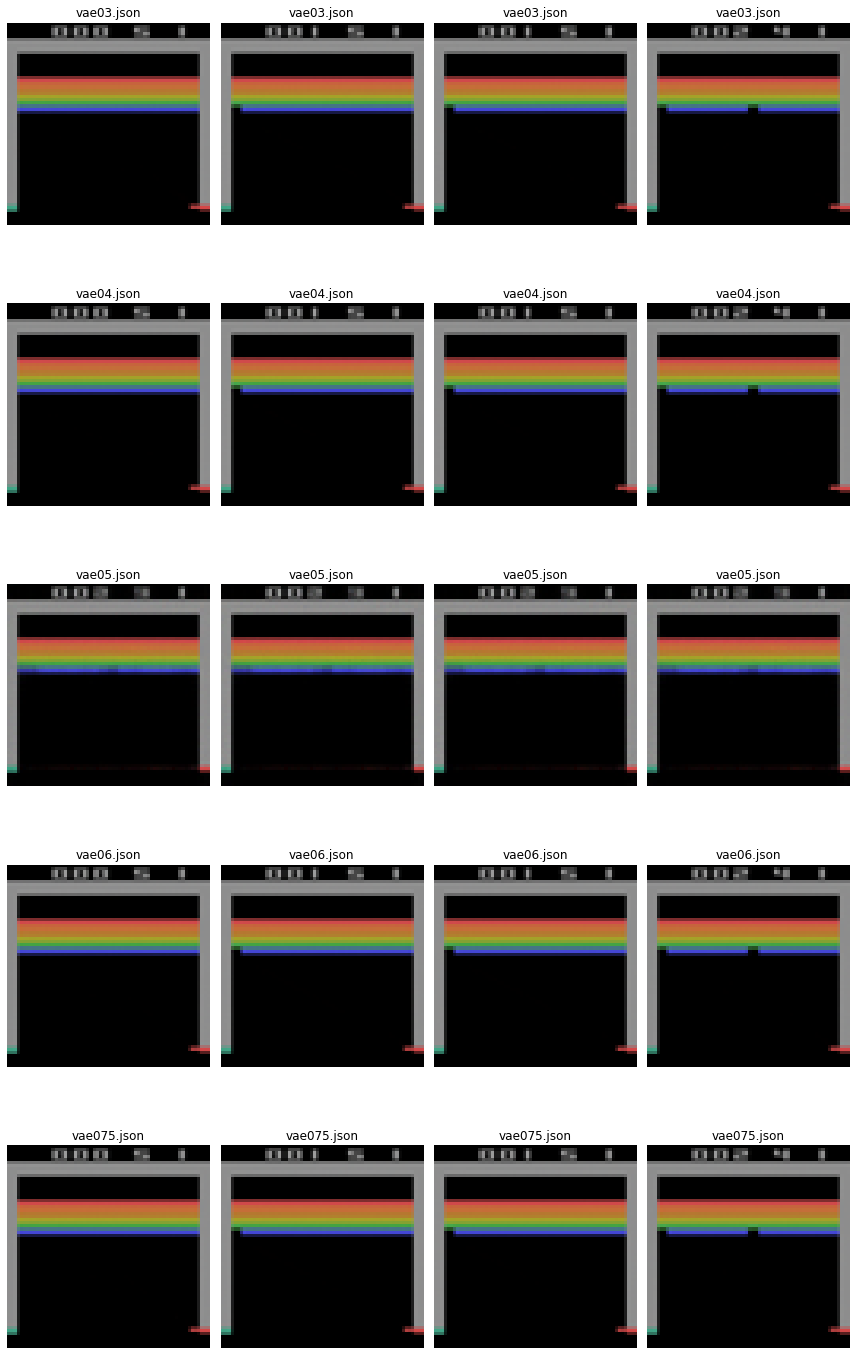

In [16]:
obs = [obs1,obs2,obs3,obs4]
fig = plt.figure(figsize=(12,20))
counter = 1
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
for vmodel in range(len(vae_modellist)): 
    vae = ConvVAE(z_size=64,
              batch_size=1,
              learning_rate=0.0001,
              kl_tolerance=kl_tolerance[vmodel],
              is_training=False,
              reuse=False,
              gpu_mode=True)
    vae.load_json(path + '/' + vae_modellist[vmodel])
    for i in range(4):
        if i==0:
            z_dec = vae.decode(vae.encode(obs[0].reshape(1,64,64,3)))
        elif i==1:
            z_dec = vae.decode(vae.encode(obs[1].reshape(1,64,64,3)))
        elif i==2:
            z_dec = vae.decode(vae.encode(obs[2].reshape(1,64,64,3)))
        elif i==3:
            z_dec = vae.decode(vae.encode(obs[3].reshape(1,64,64,3)))
        plt.subplot(5,4,counter)
        plt.imshow(z_dec.reshape(64,64,3))
        plt.axis('off')
        plt.title(vae_modellist[vmodel])
        counter+=1
plt.tight_layout()
plt.show()

Loss Params

In [42]:
vae_param_list = []
for elem in vaelist:
    if 'train_param' in elem:
        vae_param_list.append(elem)
vae_param_list.sort()
len(vae_param_list)

47

In [48]:
vae_train_param_complete = []
vae_param_list03=[elem for elem in vae_param_list if '12052003' in elem]
vae_param_list03.sort()
vae_train_param_complete.append(vae_param_list03)

In [49]:
vae_param_list04=[elem for elem in vae_param_list if '12052004' in elem]
vae_param_list04.sort()
vae_train_param_complete.append(vae_param_list04)
vae_param_list05=[elem for elem in vae_param_list if '12052005' in elem]
vae_param_list05.sort()
vae_train_param_complete.append(vae_param_list05)
vae_param_list06=[elem for elem in vae_param_list if '12052006' in elem]
vae_param_list06.sort()
vae_train_param_complete.append(vae_param_list06)
vae_param_list07=[elem for elem in vae_param_list if '12052007' in elem]
vae_param_list07.sort()
vae_param_list07
vae_train_param_complete.append(vae_param_list07)

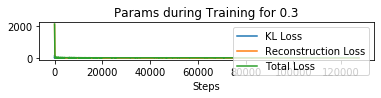

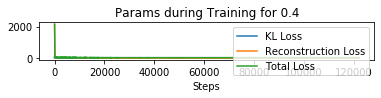

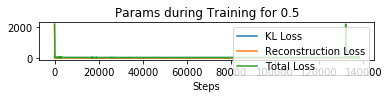

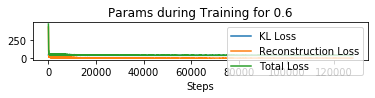

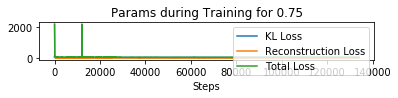

In [75]:
i=0
kl_tolerance = [0.3,0.4,0.5,0.6,0.75]
#fig = plt.figure(figsize=(40,10))
for model in vae_train_param_complete: # jedes model
    params_per_file = []
    for elem in model: # jedes file aus model
        with open(path + elem, 'r') as file:
            train_param = json.load(file)
        params_per_file.append(train_param)

    kl_loss = []
    r_loss = []
    train_loss = []
    for item in params_per_file:
        for subitem in item:
            kl_loss.append(subitem['kl_loss'])
            r_loss.append(subitem['r_loss'])
            train_loss.append(subitem['train_loss'])
    plt.subplot(5,1,i+1)
    plt.plot(kl_loss, label='KL Loss')
    plt.plot(r_loss, label='Reconstruction Loss')
    plt.plot(train_loss, label='Total Loss')
    plt.legend(loc='upper right')
    plt.xlabel('Steps')
    plt.title('Params during Training for '+ str(kl_tolerance[i]))
    plt.show()
    i+=1
        
        